Preliminary exploratory data analysis:

    - Demonstrate that the dataset can be read from the web into R 
    - Clean and wrangle your data into a tidy format
    - Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
    - Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compa
    res the distributions of each of the predictor variables you plan to use in your analysis.

In [34]:
library(tidyverse)
library(tidymodels)

In [35]:
wine_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", col_names = FALSE) |>
    mutate(X1 = as_factor(X1))
colnames(wine_data) <- c("class","alcohol", "malic.acid", "ash", "alcalinity.of.ash","magnesium", "total,phenols",
                         "flavanoids", "nonfalvanoid.phenols", "proanthocyanins", "color.intensity", "hue",
                         "OD280/OD315.of.diluted wines", "proline")

wine_data

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,"total,phenols",flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280/OD315.of.diluted wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


In [36]:
wine_means <- wine_data |>
    summarise(across(alcohol:proline, mean, na.rm = TRUE))
wine_means

alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,"total,phenols",flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280/OD315.of.diluted wines,proline
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.00062,2.336348,2.366517,19.49494,99.74157,2.295112,2.02927,0.3618539,1.590899,5.05809,0.9574494,2.611685,746.8933


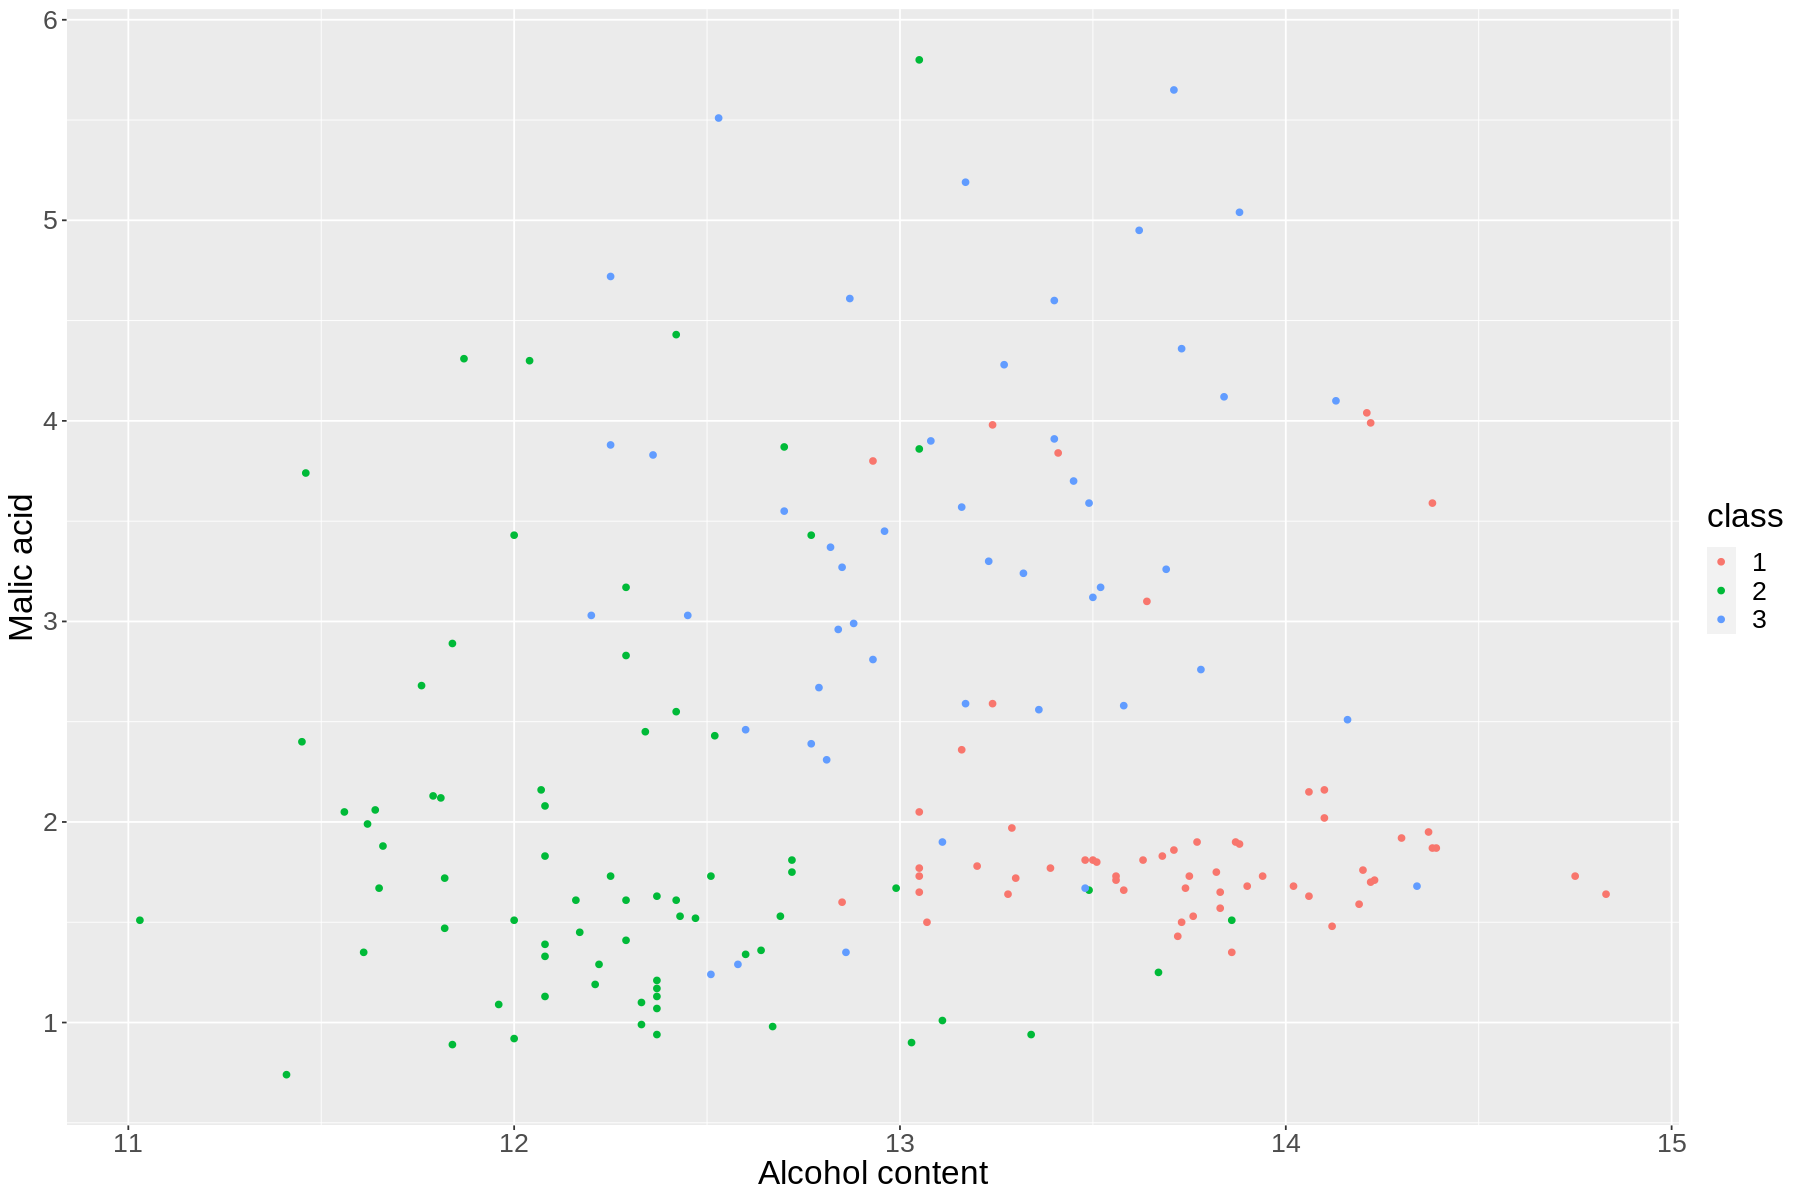

In [37]:

options(repr.plot.width = 15, repr.plot.height = 10)
wine_plot <- wine_data |>
    ggplot(aes(x = alcohol, y = malic.acid, colour = class)) +
    geom_point() +
labs(x = "Alcohol content", y = "Malic acid") +
    theme(text = element_text(size = 20))
wine_plot